In [45]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [46]:
data = pd.read_csv("hourlywagedata.csv")
data.shape

(3000, 4)

In [47]:
data.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338


#### Checking for missing values and replacing with Nan values

In [48]:
data['hourwage'].replace(' ', np.nan, inplace=True)
data[data['hourwage'] == ' '].index

data.shape


(3000, 4)

In [49]:
data.isnull().sum()

position     0
agerange     0
yrsscale     0
hourwage    89
dtype: int64

### Droping the column having missing values

In [50]:
data= data.dropna(subset=['hourwage'])
data.shape

(2911, 4)

### Converting the hourwage datatype to float

In [51]:
data['hourwage'] = data['hourwage'].astype(float)

### Checking for datatypes

In [52]:
data.dtypes

position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

In [53]:
data.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234
1,0,1,2,16.440731
2,0,1,3,21.389108
3,1,1,1,11.377187
4,0,1,3,21.560778


In [54]:
#Get Average hour wages
avg_hr_wages=data["hourwage"].mean()
avg_hr_wages

20.015860036296488

### Changing the categorial values to plot 

In [55]:
age_category=pd.cut(data.agerange,bins=[0,1,2,3],labels=['18-30','31-45','46-65'])
data.insert(4,'age_category',age_category)
data

,position,agerange,yrsscale,hourwage,age_category
0,1,1,2,13.736234,18-30
1,0,1,2,16.440731,18-30
2,0,1,3,21.389108,18-30
3,1,1,1,11.377187,18-30
4,0,1,3,21.560778,18-30
...,...,...,...,...,...
2995,0,3,4,20.419885,46-65
2996,0,3,4,20.441482,46-65
2997,1,3,4,18.450234,46-65
2998,0,3,4,19.144460,46-65


In [56]:
yrs_category=pd.cut(data.yrsscale,bins=[0,1,2,3,4,5,6],labels=['5 or less','6-10','11-15','16-20','21-35','36 or more'])
data.insert(5,'yrs_category',yrs_category)
data

,position,agerange,yrsscale,hourwage,age_category,yrs_category
0,1,1,2,13.736234,18-30,6-10
1,0,1,2,16.440731,18-30,6-10
2,0,1,3,21.389108,18-30,11-15
3,1,1,1,11.377187,18-30,5 or less
4,0,1,3,21.560778,18-30,11-15
...,...,...,...,...,...,...
2995,0,3,4,20.419885,46-65,16-20
2996,0,3,4,20.441482,46-65,16-20
2997,1,3,4,18.450234,46-65,16-20
2998,0,3,4,19.144460,46-65,16-20


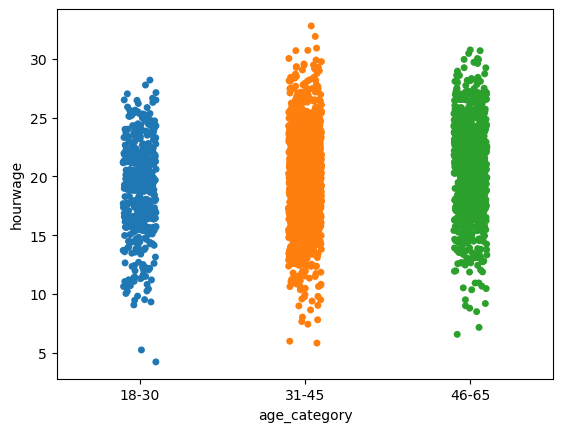

In [57]:
sns.stripplot(data=data, x="age_category", y="hourwage")
plt.show()

From the above plot ,hourly wages are seens more with people on age group from 31 to 45 when compared to other age category.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cann

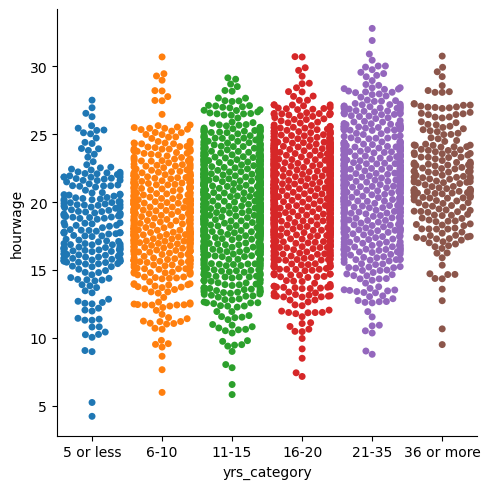

In [58]:
sns.catplot(data=data, x="yrs_category", y="hourwage", kind="swarm")
plt.show()

From the above plot , it is evident that the 5th category (21-35) takes a wider population sample and higher hourly wage. Indeed there is a very similar pattern across all years of category and the hourly wage. It starts at a lower range for the junior resources and later on when the experience goes higher they have better salary outcomes.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


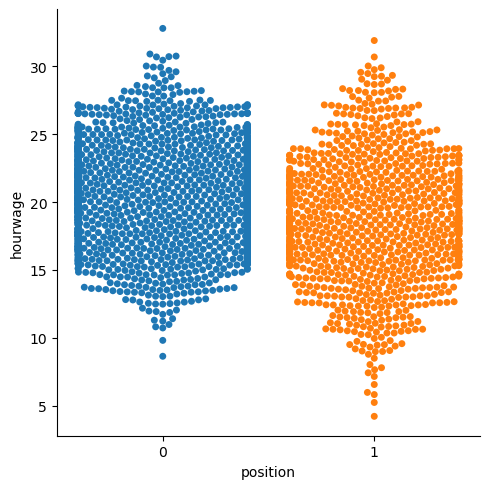

In [60]:
sns.catplot(data=data, x="position", y="hourwage", kind="swarm")
plt.show()

### Multiple Linear Regression

#### Identifing dependent and independent variables

In [61]:
# Here x is independent and y is dependent variable
x = data.iloc[:,[0,1,2]].values
y = data.iloc[:,3].values
y = y.reshape(-1, 1)
x = x.reshape(-1, 3)


In [62]:
# create an empty linear regression model 
hourwages_model = LinearRegression()

# to create the model, we use fit(x,y)
hourwages_model.fit(x,y)


LinearRegression()

### Spliting the data as Training and test dataset

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,shuffle=True)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (2328, 3) (2328, 1)
Test data: (583, 3) (583, 1)


Using a 0.2 test size split our data of 2911 items into a training set of 2328 observations and three columns, and a test set of 583 observations.

We can use this to evaluate our model.

#### Applying Model on traning dataset

In [64]:
# creating an object of LinearRegression class
mlr = LinearRegression()

# fitting the training data
model = mlr.fit(X_train,y_train)

#Once the model is ready we have X_test data we use this data for the predicting hourlywages
y_pred = mlr.predict(X_test)

In [65]:
y_pred[0:5]

array([[19.7151798 ],
       [17.40213187],
       [21.06594657],
       [17.40213187],
       [19.7151798 ]])

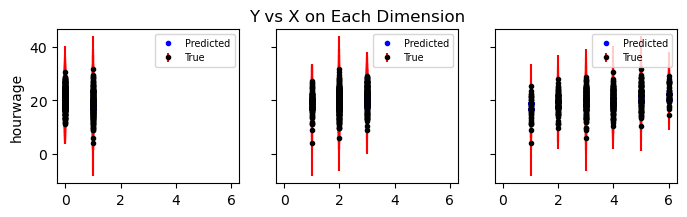

In [66]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Get values for the error bar
error_bar_values = np.abs((y_test-y_pred)[:,0])

# Plot error bars (should be no error)
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], y_pred[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

In [67]:
print (" Root Mean Square Error :", mean_squared_error(y_test, y_pred))


 Root Mean Square Error : 14.219185244309811


In [68]:
print('Intercept: \n', hourwages_model.intercept_)
print('Coefficients: \n', hourwages_model.coef_)


Intercept: 
 [18.26163096]
Coefficients: 
 [[-2.0197037  -0.22575442  0.82398308]]
